## Introduction

Entropy will appear in two areas of Machine Learning:

- Entropy and Information Gain in Decision Trees.
- Entropy as a Loss Function

## Entropy in Decision Trees

**Please read [entropy-how-decision-trees-make-decisions](https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8) first. If you are like me, who touched on Entropy as a loss function, then it is slightly confusing for the entropy here. Entropy is a measure of disorder and chaos.**

## Definition (Entropy)

In [information theory](information_theory "wikilink"), the **entropy** of a [random variable](random_variable "wikilink") is the average level of \"information\", \"surprise\", or \"uncertainty\" inherent to the variable\'s possible outcomes. Given a discrete random variable $Y$, with possible outcomes $y_1, ..., y_n$, which occur with probability

$$\mathrm{P}(Y=y_1), ..., \mathrm{P}(Y=y_n)$$

the entropy of $Y$ is formally defined as:

$$\mathrm{H}(Y)= -\sum _{i=1}^{n}{\mathrm{P}(y_{i})\log \mathrm{P}(y_{i})}$$

where $\Sigma$ denotes the sum over the variable\'s possible values. The
choice of base for $\log$, the [logarithm](logarithm "wikilink"), varies
for different applications. Base 2 gives the unit of
[bits](bit "wikilink") (or \"[shannons](shannon_(unit) "wikilink")\"),
while base [*e*](Euler's_number "wikilink") gives \"natural units\"
[nat](nat_(unit) "wikilink"), and base 10 gives units of \"dits\",
\"bans\", or \"[hartleys](Hartley_(unit) "wikilink")\". An equivalent
definition of entropy is the [expected value](expected_value "wikilink")
of the [self-information](self-information "wikilink") of a
variable.

### Intuition (Entropy and Information Theory)

From Wikipedia: Consider making my own example to reinforce concept.

Intuitively, if we are predicting an image of a cat vs dog, and we pass in a query image $x_{q}$ of pixels, we expect the $y_{q}$ to take on class 0 or 1. However, taking a step back, in ML setting, we often have a calibrated probability $y_{q}$ before the classifier tells us whether it is a 0 or 1 based on a decision (say if probability more than 0.5, then its 1, and 0 otherwwise). This probability is a soft label and in our scenario, should output an array 

```python
y_q = [probability of x_q being a cat 0, probability of x_q being a dog 1] = [0.5, 0.5]
```

In this case, we can say that our prediction $Y$ is a DISCRETE random variable with probability distribution $p$, and thus the entropy of $Y$ can be formally defined as:

$$\mathrm{H}(Y)= -\sum _{i=1}^{n}{\mathrm{P}(y_{i})\log \mathrm{P}(y_{i})}$$

where we are summing over all values that $Y$ took on.

In this case, it is 

```python
entropy of y_q = -( 0.5 * lg 0.5 + 0.5 * lg 0.5 ) = -(-0.5 + -0.5) = 1
```

Note we are using lg base 2 here and so our maximum entropy is 1.

- Entropy is maximum if each random variable is equi-probable.
- Entropy Loss is usually used as a loss function in ML as it penalizes "wrong predictions" and favours confident predictions.

In the image below, let's say $Y$ is a random variable taking on a uniform distribution, for example, if we are predicting a cat or dog image, where $y$ is the probability output from a classifier, taking on 0 to 1. If we were to assume $y \sim U[0,1]$, then it follows that $H(y) = 1$ as $y$ will always be of $[0.5, 0.5]$ in prediction.

Let us now see two different cases if $y$ follows a gaussian distribution, $y_{1} \sim \mathcal{N_1}[0,1]$ and $y_{2} \sim \mathcal{N_2}[0,1]$

Visually, we can see that the second gaussian has a higher peak than the first, hence we can deduce that $H(y_{2}) < H(y_{1})$ because since the higher peak suggest that the points of $y_{2}$ are tightly spread around each other, and since the points are close, there is less penalty in the $\log$. Even more geometrically, if we take "uniform distribution" as the one with highest entropy, we can say that as the gaussian curve smoothes out -> becoming more uniform, then the entropy rises.


<img src="https://storage.googleapis.com/reighns/reighns_ml_projects/docs/deep_learning/fundamental_concepts/loss_functions/entropy_and_information_gain_uniform_gaussian_entropy_graph.jpg" width="500" height="500" style="margin-left:auto; margin-right:auto"/>
<p style="text-align: center">
    <b>Fig; By Hongnan G.</b>
</p>


### Python Code (Entropy in Information Gain)

In [16]:
from math import log2
from typing import *
from typing import List

import numpy as np
import scipy

Given a list of labels, (i.e. ground truth labels of 5 images of cats and dogs):

- Ground Truth Labels: `['dog', 'dog', 'cat', 'cat', 'dog'] = [0, 0, 1, 1, 0]`
- Class Probabilities: Note carefully in this entropy context, this class probabilities **IS NOT** the softmax activation, instead, it is just the **FREQUENCY** of each class. `[3/5, 2/5]` where dog has frequency of $\frac{3}{5}$ and cat $\frac{2}{5}$.



In [35]:
from math import log2
from typing import *
from typing import List

import numpy as np
import scipy


def compute_class_probabilities(labels: List[Any]) -> List[float]:
    """Calculate frequency of each class.


    From DSFS book, it mentions that we do not actually care about which label is associated with which probability. Thus it is okay to use a dictionary which does not preserve order.

    Args:
        labels (List[Any]): The labels of the data.

    Returns:
        label_probs (List[float]): The frequency of each class.

    Example:
        >>> labels = ['dog', 'dog', 'cat', 'cat', 'dog'] = [0, 0, 1, 1, 0]
        >>> assert compute_class_probabilities(labels) == [2/5, 3/5] or class_probabilities(labels) == [3/5, 2/5]
    """

    num_samples = len(labels)

    label_count: Dict = {}
    label_probs: List = []

    for label in labels:
        if label not in label_count:
            label_count[label] = 1
        else:
            label_count[label] += 1

    for label, count in label_count.items():

        label_probs.append(count / num_samples)

    return label_probs


def compute_entropy_with_class_probability(
    class_probabilities: List[float],
    epsilon: float = 1e-15,
    log_base: int = 2,
) -> float:
    """The formula for entropy is:
    $$\mathrm{H}(Y)= -\sum _{i=1}^{n}{\mathrm{P}(y_{i})\log \mathrm{P}(y_{i})}$$

    Args:
        class_probabilities (List[float]): Frequency probability of class occurences.

    Returns:
        entropy (float): The entropy of the dataset.

    Example:
        >>> # maximum chaos -> entropy = 1
        >>> class_probabilities = [1/2, 1/2]
        >>> assert compute_entropy_with_class_probability(class_probabilities) == 1
        >>> # minimum chaos -> entropy = 0
        >>> class_probabilities = [1, 0] # or [0, 1]
        >>> assert np.isclose(compute_entropy_with_class_probability(class_probabilities), 0)
        >>> class_probabilities = [2/5, 3/5]
        >>> assert compute_entropy_with_class_probability(class_probabilities) == 0.9709505944546686
    """

    assert (
        np.sum(class_probabilities) == 1
    ), f"Probabilities do not sum to 1 and is {np.sum(class_probabilities)}!"

    assert log_base in [
        2,
        10,
    ], f"log_base must be either 2 or 10. Got {log_base}!"

    if log_base == 2:
        log_fn = getattr(np, "log2")
    else:
        log_fn = getattr(np, "log10")

    entropy = 0
    for y in class_probabilities:
        if y == 0:
            y = epsilon
        entropy += y * log_fn(y)
    entropy = -1 * entropy

    return entropy


def compute_entropy_with_class_labels(
    labels: List[Any], *args, **kwargs
) -> float:
    """Compute the entropy of the dataset given class labels.

    Args:
        labels (List[Any]): The labels of the data.

    Returns:
        entropy (float): The entropy of the dataset.

    Example:
        >>> from scipy.stats import entropy
        >>> labels = [0, 0, 1, 1, 0] # ['dog', 'dog', 'cat', 'cat', 'dog']
        >>> # Note scipy's entropy takes in class freq
        >>> np.isclose(compute_entropy_with_class_labels(labels=labels, epsilon=1e-15, log_base=2), entropy([3/5, 2/5], base=2))
    """

    return compute_entropy_with_class_probability(
        compute_class_probabilities(labels), *args, **kwargs
    )


In [36]:
>>> # maximum chaos -> entropy = 1
>>> class_probabilities = [1/2, 1/2]
>>> assert compute_entropy_with_class_probability(class_probabilities) == 1
>>> # minimum chaos -> entropy = 0
>>> class_probabilities = [1, 0] # or [0, 1]
>>> assert np.isclose(compute_entropy_with_class_probability(class_probabilities), 0)
>>> class_probabilities = [2/5, 3/5]
>>> assert compute_entropy_with_class_probability(class_probabilities) == 0.9709505944546686

In [39]:
>>> from scipy.stats import entropy
>>> labels = [0, 0, 1, 1, 0] # ['dog', 'dog', 'cat', 'cat', 'dog'] 
>>> # Note scipy's entropy takes in class freq
>>> np.isclose(compute_entropy_with_class_labels(labels=labels, epsilon=1e-15, log_base=2), entropy([3/5, 2/5], base=2))

True

### Entropy Graph vs Different Class Distributions

We see that the Entropy of each point in the plot below, and find that on the extreme, `[0, 1]` and `[1, 0]`, our entropy is the lowest with 0. The plot below is akin to our dataset having 2 distinct classes, but with different class frequencies.

Consider a dataset with 10 cats and dogs (0 and 1 respectively), then the scenario below illustrates:

- `[0, 1]` represents there are 0 cats and 10 dogs. This dataset is considered pure and has 0 entropy. Think of it as easy for us to distinguish cats and dogs in a dataset with only dogs.
- `[0.1, 0.9]` represents 1 cats and 9 dogs. The entropy is a little higher since we need to spend some effort to distinguish the 1 cat from 9 dogs.
- `[0.5, 0.5]` represents 5 cats and 5 dogs. The entropy is highest here and the most impure since there is an equal mixture and distribution of cats and dogs.
- `[1, 0]` similar case to `[0, 1]`.

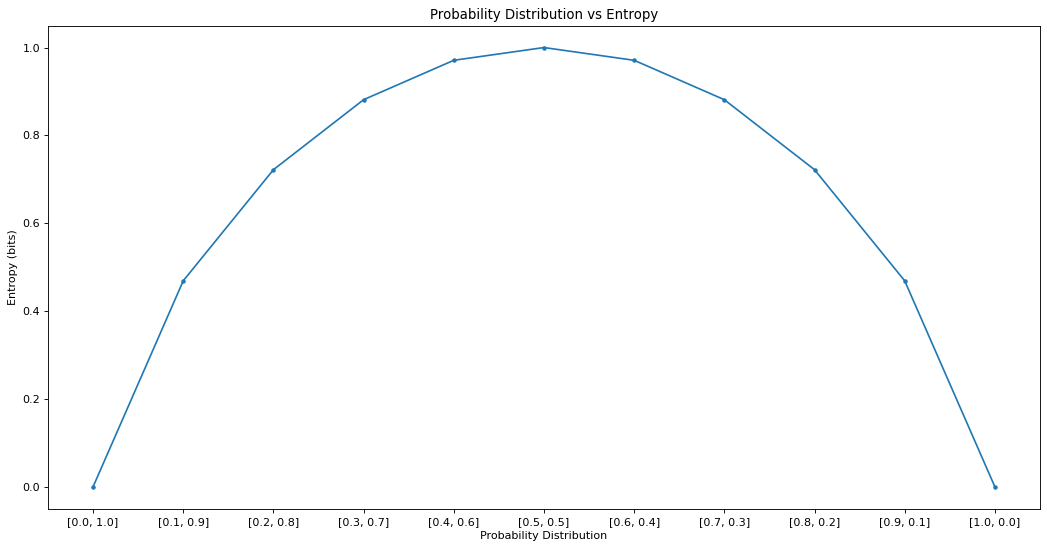

In [40]:
# Reference to machine learning mastery
# compare probability distributions vs entropy
from math import log2
from matplotlib import pyplot
from matplotlib.pyplot import figure

figure(figsize=(16, 8), dpi=80)
# calculate entropy
def entropy(events, ets=1e-15):
    return -sum([p * log2(p + ets) for p in events])
 
# define probabilities
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]
# create probability distribution
dists = [[round(p, 1) , round((1.0 - p), 1)] for p in probs]

# calculate entropy for each distribution
ents = [entropy(d) for d in dists]
# plot probability distribution vs entropy
pyplot.plot(probs, ents, marker='.')
pyplot.title('Probability Distribution vs Entropy')
pyplot.xticks(probs, [str(d) for d in dists])
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Entropy (bits)')
pyplot.show()

## Entropy as a loss function

Read more in the section **cross_entropy_loss**.

- [machinelearningmastery-information-entropy](https://machinelearningmastery.com/what-is-information-entropy/)
- [analytics-vidhya-entropy-loss](https://medium.com/analytics-vidhya/understanding-entropy-the-golden-measurement-of-machine-learning-4ea97c663dc3#:~:text=By%20using%20entropy%20in%20machine,be%20desired%20in%20model%2Dbuilding.)
- [cross-entropy-loss-machine-learning-mastery](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)
- [entropy-how-decision-trees-make-decisions](https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8)
- https://ramsane.github.io/articles/cross-entropy-explained-with-entropy-and-kl-divergence
- https://neptune.ai/blog/cross-entropy-loss-and-its-applications-in-deep-learning